In [1]:
%pip install seaborn
%pip install folium

  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached contourpy-1.2.1-cp312-cp312-macosx_11_0_arm64.whl.metadata (5.8 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 1.9 MB/s eta 0:00:00a 0:00:01
  Using cached kiwisolver-1.4.5-cp312-cp312-macosx_11_0_arm64.whl.metadata (6.4 kB)
  Using cached pyparsing-3.1.2-py3-none-any.whl.metadata (5.1 kB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 9.1 MB/s eta 0:00:0000:0100:01
Using cached contourpy-1.2.1-cp312-cp312-macosx_11_0_arm64.whl (245 kB)
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 9.3 MB/s eta 0:00:00a 0:00:01m
Using cached kiwisolver-1.4.5-cp312-cp312-macosx_11_0_arm64.whl (64 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 10.3 MB/s eta 0:00:00a 0:00:01
Using cached pyparsing-3.1.2-py3-none-a

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import folium

In [3]:
%matplotlib inline

In [5]:
import requests
import pandas as pd
import io

URL = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/Historical_Wildfires.csv"

response = requests.get(URL)
if response.status_code == 200:
    data = response.content
    df = pd.read_csv(io.StringIO(data.decode('utf-8')))
    print(df.head())
else:
    print("Failed to retrieve data")

  Region      Date  Estimated_fire_area  Mean_estimated_fire_brightness  \
0    NSW  1/4/2005              8.68000                      312.266667   
1    NSW  1/5/2005             16.61125                      322.475000   
2    NSW  1/6/2005              5.52000                      325.266667   
3    NSW  1/7/2005              6.26400                      313.870000   
4    NSW  1/8/2005              5.40000                      337.383333   

   Mean_estimated_fire_radiative_power  Mean_confidence  Std_confidence  \
0                            42.400000        78.666667        2.886751   
1                            62.362500        85.500000        8.088793   
2                            38.400000        78.333333        3.214550   
3                            33.800000        92.200000        7.529940   
4                           122.533333        91.000000        7.937254   

   Var_confidence  Count Replaced  
0        8.333333      3        R  
1       65.428571      8  

In [6]:
df.columns

Index(['Region', 'Date', 'Estimated_fire_area',
       'Mean_estimated_fire_brightness', 'Mean_estimated_fire_radiative_power',
       'Mean_confidence', 'Std_confidence', 'Var_confidence', 'Count',
       'Replaced'],
      dtype='object')

In [7]:
df.dtypes

Region                                  object
Date                                    object
Estimated_fire_area                    float64
Mean_estimated_fire_brightness         float64
Mean_estimated_fire_radiative_power    float64
Mean_confidence                        float64
Std_confidence                         float64
Var_confidence                         float64
Count                                    int64
Replaced                                object
dtype: object

In [8]:
import datetime as dt

df['Year'] = pd.to_datetime(df['Date']).dt.year
df['Month'] = pd.to_datetime(df['Date']).dt.month
df.dtypes

Region                                  object
Date                                    object
Estimated_fire_area                    float64
Mean_estimated_fire_brightness         float64
Mean_estimated_fire_radiative_power    float64
Mean_confidence                        float64
Std_confidence                         float64
Var_confidence                         float64
Count                                    int64
Replaced                                object
Year                                     int32
Month                                    int32
dtype: object

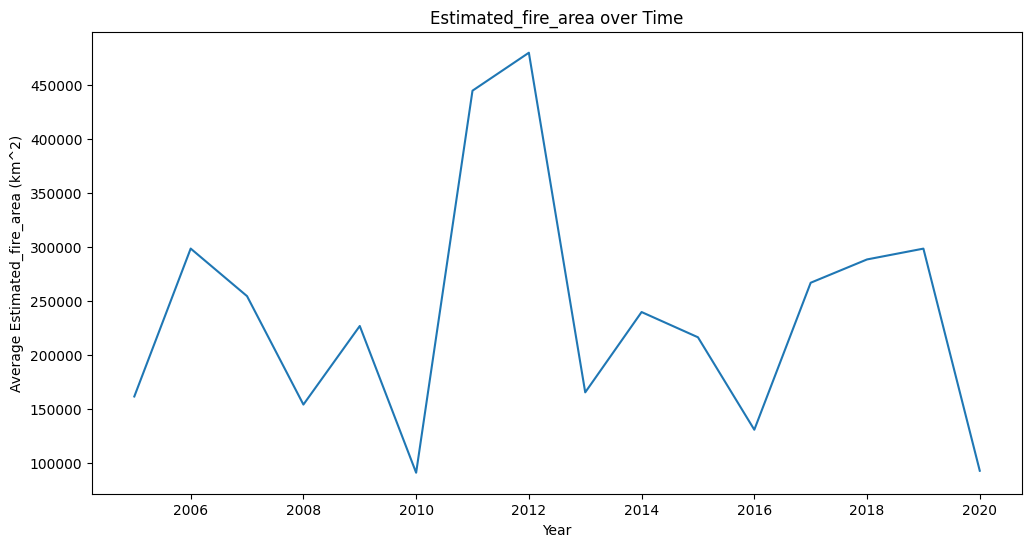

In [9]:
plt.figure(figsize=(12,6))

df_new = df.groupby(['Year'])['Estimated_fire_area'].sum()

df_new.plot(x=df_new.index, y=df_new.values)

plt.xlabel('Year')
plt.ylabel('Average Estimated_fire_area (km^2)')
plt.title('Estimated_fire_area over Time')

plt.show()

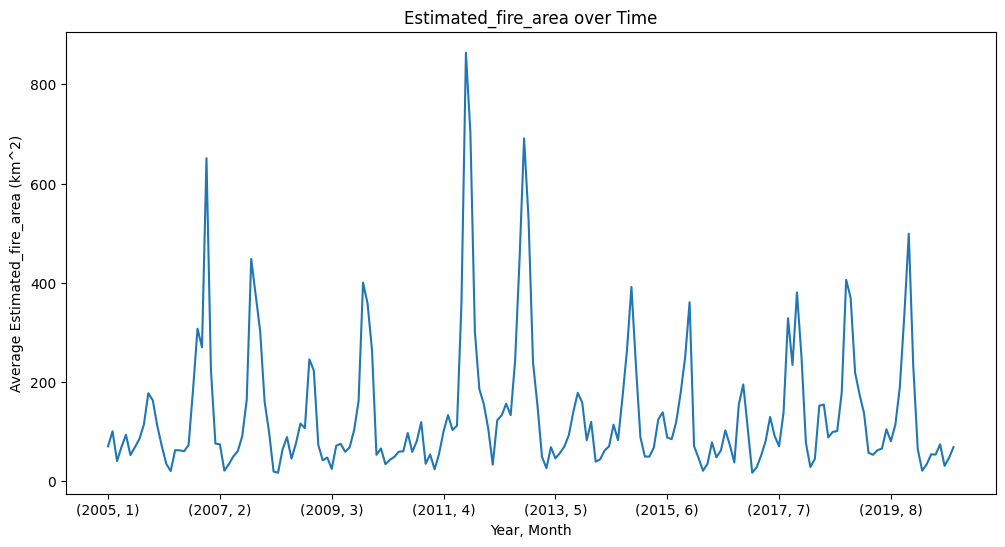

In [10]:
plt.figure(figsize=(12,6))

df_new = df.groupby(['Year','Month'])['Estimated_fire_area'].mean()

df_new.plot(x=df_new.index, y=df_new.values)

plt.xlabel('Year, Month')
plt.ylabel('Average Estimated_fire_area (km^2)')
plt.title('Estimated_fire_area over Time')

plt.show()

In [11]:
df['Region'].unique()

array(['NSW', 'NT', 'QL', 'SA', 'TA', 'VI', 'WA'], dtype=object)

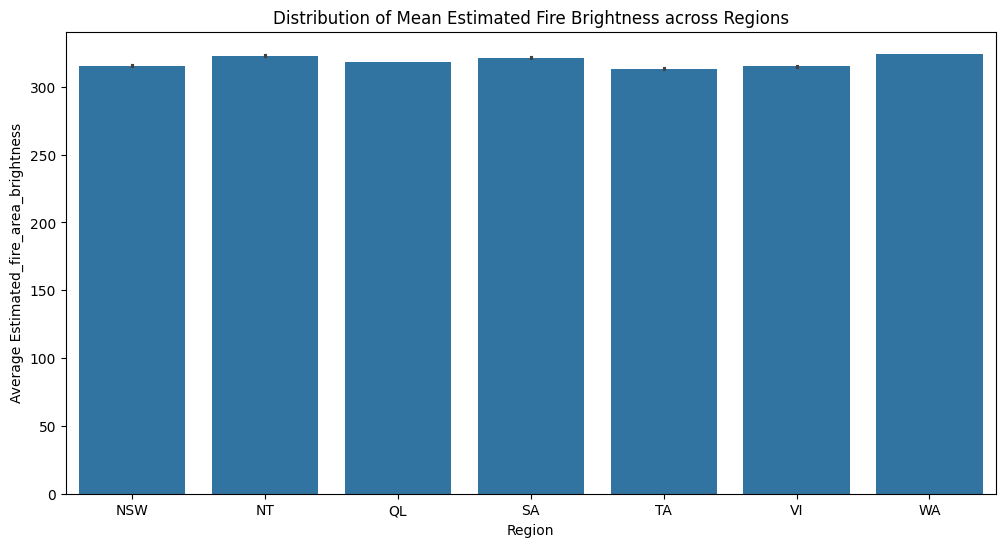

In [15]:
plt.figure(figsize=(12,6))

sns.barplot(data=df, x='Region', y='Mean_estimated_fire_brightness')

plt.xlabel('Region')
plt.ylabel('Average Estimated_fire_area_brightness')
plt.title('Distribution of Mean Estimated Fire Brightness across Regions')

plt.show()

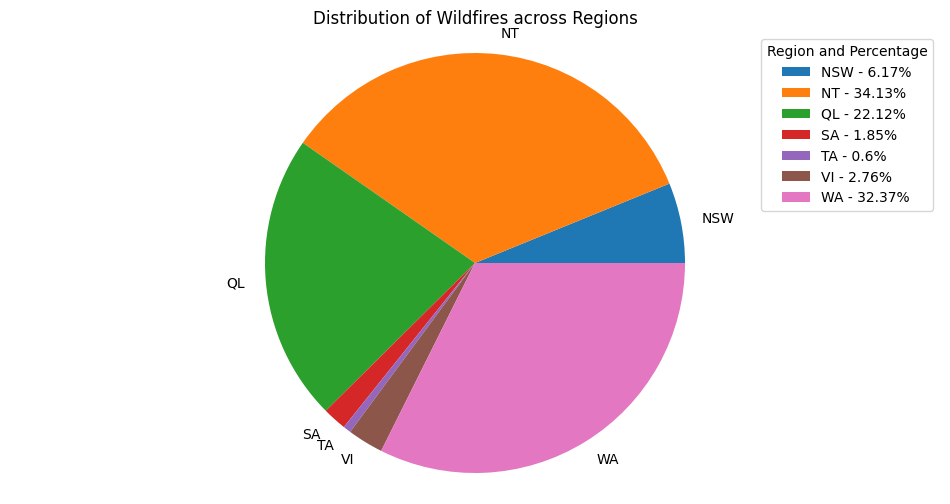

In [17]:
plt.figure(figsize=(12,6))

region_counts = df.groupby('Region')['Count'].sum()

plt.pie(region_counts, labels=region_counts.index)

# Create a custom legend with percentages
legend_labels = [(i, round(k / region_counts.sum() * 100, 2)) for i, k in zip(region_counts.index, region_counts)]
plt.legend([f'{label} - {pct}%' for label, pct in legend_labels], title="Region and Percentage")

plt.title('Distribution of Wildfires across Regions')
plt.axis('equal')

plt.show()

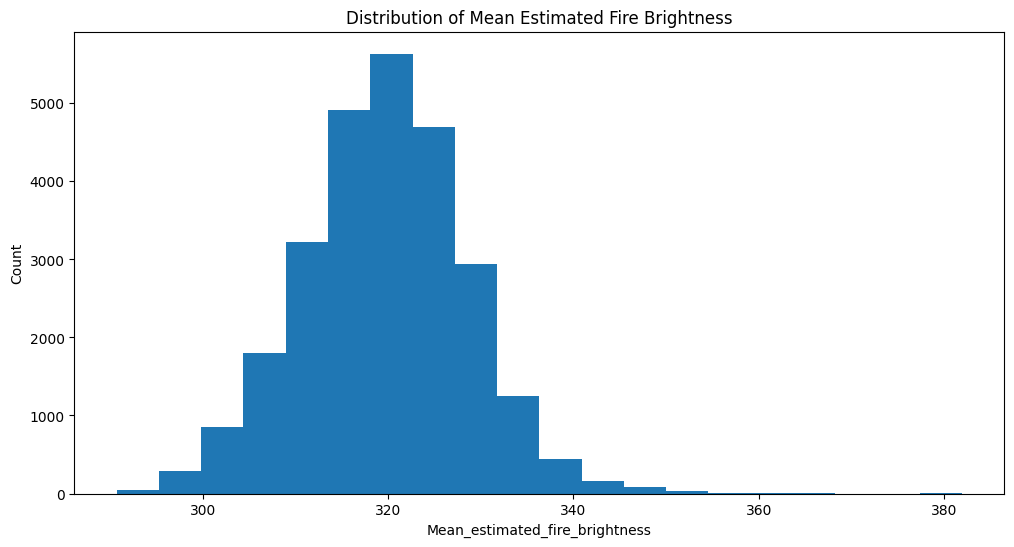

In [18]:
plt.figure(figsize=(12,6))

plt.hist(df['Mean_estimated_fire_brightness'], bins=20)

plt.xlabel('Mean_estimated_fire_brightness')
plt.ylabel('Count')
plt.title('Distribution of Mean Estimated Fire Brightness')

plt.show()

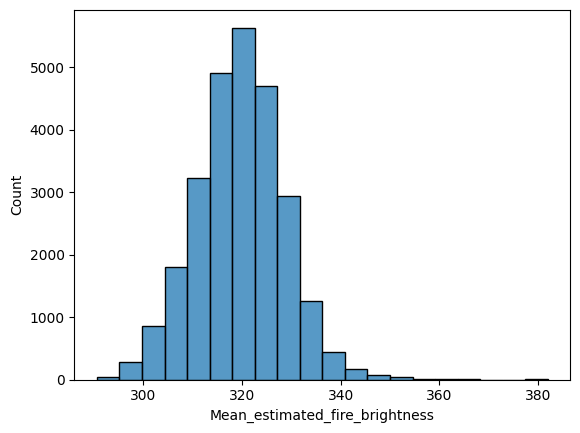

In [19]:
sns.histplot(data=df, x='Mean_estimated_fire_brightness', bins=20)
plt.show()

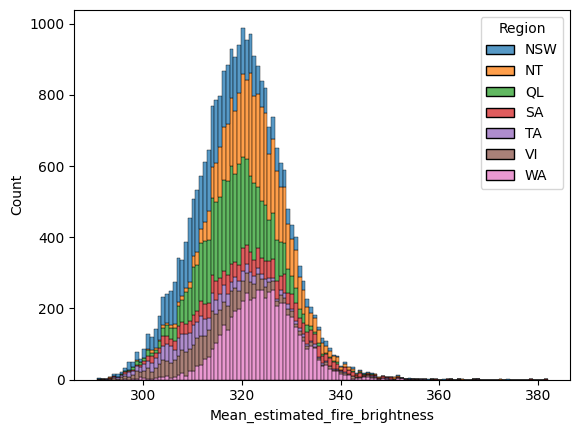

In [20]:
sns.histplot(data=df, x='Mean_estimated_fire_brightness', hue='Region', multiple='stack')
plt.show()

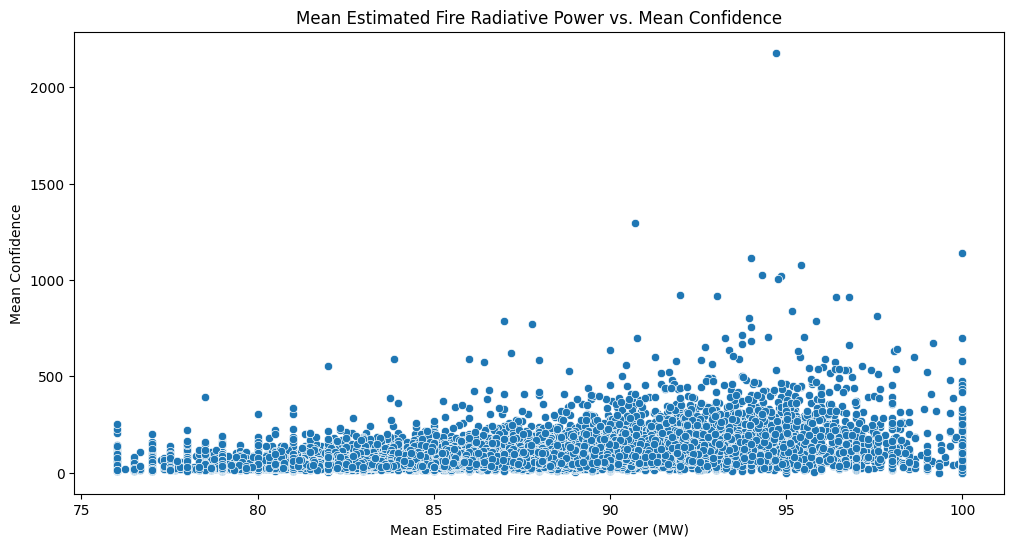

In [22]:
plt.figure(figsize=(12,6))

sns.scatterplot(data=df, x='Mean_confidence', y='Mean_estimated_fire_radiative_power')

plt.xlabel('Mean Estimated Fire Radiative Power (MW)')
plt.ylabel('Mean Confidence')
plt.title('Mean Estimated Fire Radiative Power vs. Mean Confidence')

plt.show()

In [23]:
region_data = {'region':['NSW','QL','SA','TA','VI','WA','NT'], 'Lat':[-31.8759835,-22.1646782,-30.5343665,-42.035067,-36.5986096,-25.2303005,-19.491411], 
               'Lon':[147.2869493,144.5844903,135.6301212,146.6366887,144.6780052,121.0187246,132.550964]}
reg=pd.DataFrame(region_data)
reg

,region,Lat,Lon
0,NSW,-31.875984,147.286949
1,QL,-22.164678,144.584490
2,SA,-30.534367,135.630121
3,TA,-42.035067,146.636689
4,VI,-36.598610,144.678005
5,WA,-25.230300,121.018725
6,NT,-19.491411,132.550964


In [24]:
aus_reg = folium.map.FeatureGroup()

Aus_map = folium.Map(location=[-25,135], zoom_start=4)

for lat,lng, lab in zip(reg.Lat, reg.Lon, reg.region):
    aus_reg.add_child(
        folium.features.CircleMarker(
            [lat,lng],
            popup=lab,
            radius=5,
            color='blue',
            fill=True,
            fill_color='blue',
            fill_opacity=0.6
        )
    )

Aus_map.add_child(aus_reg)